In [3]:
url = "https://github.com/PinkWink/playing_data/raw/master/data/teenage_mental.xls"

In [4]:
import pandas as pd

pd.read_excel(url, engine = 'xlrd')

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [5]:
pd.read_excel(url, engine = 'xlrd', header = 1) #header는 해당 행을 열 인덱스로 사용하는 것임.

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [6]:
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울감경험률', '우울남학생', '우울여학생', '자살생각율'\
             , '자살남학생', '자살여학생']

raw_data = pd.read_excel(url, header = 1, usecols="C:K", engine='xlrd', names =col_names)
#usecols -> 실제 엑셀에서 몇번째열인지~, names -> 열의 이름

In [7]:
raw_data.loc[0]
#[]안의 이름을 가진 행을 가져오는 것.

스트레스       42.7
스트레스남학생    34.5
스트레스여학생    51.5
우울감경험률     29.6
우울남학생      24.2
우울여학생      35.4
자살생각율      15.4
자살남학생      11.8
자살여학생      19.2
Name: 0, dtype: float64

In [8]:
raw_data.loc[0, '스트레스']

42.7

In [9]:
raw_data.loc[1] = 100.0-raw_data.loc[0]
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [10]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [11]:
raw_data = raw_data.set_index('응답')

In [12]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [13]:
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


<Axes: ylabel='스트레스'>

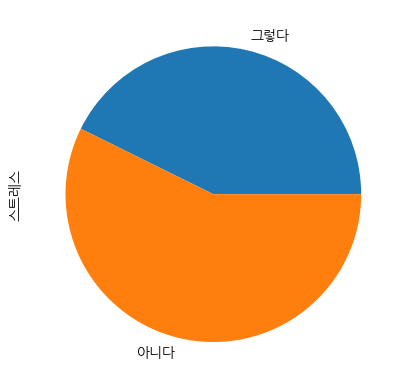

In [14]:
raw_data['스트레스'].plot.pie()

<function matplotlib.pyplot.show(close=None, block=None)>

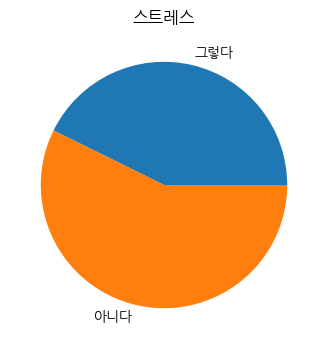

In [15]:
plt.figure(figsize= (12, 4))
raw_data['스트레스'].plot.pie()
plt.xlabel('')
plt.ylabel('')
plt.title('스트레스')
plt.show

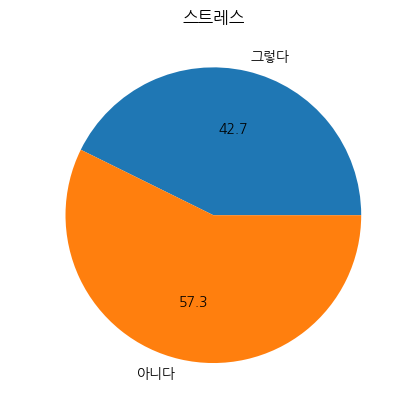

In [16]:
plt.figure()
raw_data['스트레스'].plot.pie(autopct = '%.1f') #오토퍼센트.
plt.ylabel(' ')
plt.title('스트레스')
plt.show()

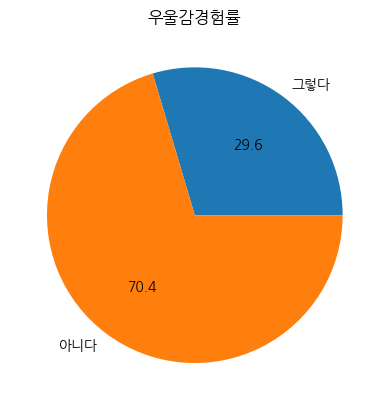

In [17]:
plt.figure()
raw_data['우울감경험률'].plot.pie(autopct = '%.1f')
plt.ylabel('')
plt.title('우울감경험률')
plt.show()


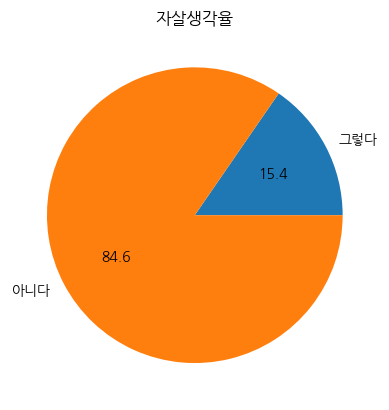

In [18]:
plt.figure()
raw_data['자살생각율'].plot.pie(autopct = '%.1f')
plt.ylabel('')
plt.title('자살생각율')
plt.show()

Text(0, 0.5, '')

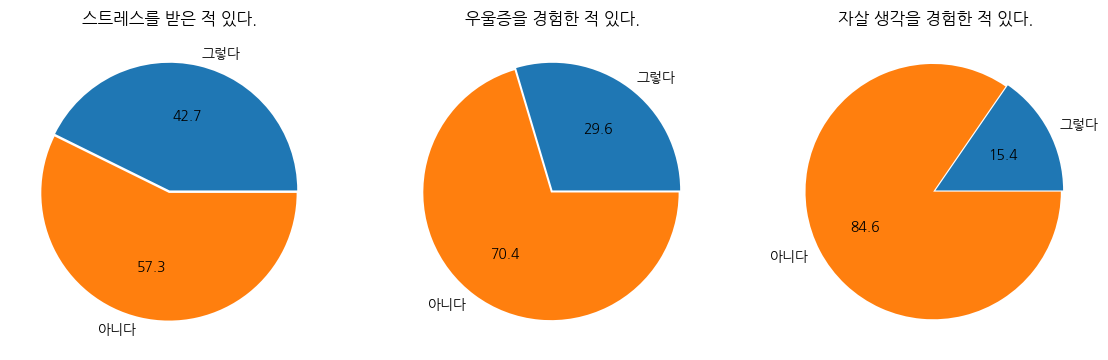

In [19]:
f, ax = plt.subplots(1, 3, figsize = (14,6))

raw_data['스트레스'].plot.pie(explode = [0, 0.02], ax = ax[0], autopct = '%.1f')
ax[0].set_title('스트레스를 받은 적 있다.')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode = [0, 0.02], ax = ax[1], autopct = '%.1f')
ax[1].set_title('우울증을 경험한 적 있다.')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode = [0, 0.02], ax = ax[2], autopct = '%.1f' )
ax[2].set_title('자살 생각을 경험한 적 있다.')
ax[2].set_ylabel('')